In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('price_range',axis=1)
y = df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
lr_pred = LR.predict(X_test)

C:\Users\Atharva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import accuracy_score,classification_report
lr_acc = accuracy_score(y_test,lr_pred)
lr_acc

0.6325

In [13]:
lr_report = classification_report(y_test,lr_pred,output_dict=True)
lr_report

{'0': {'precision': 0.8229166666666666,
  'recall': 0.7523809523809524,
  'f1-score': 0.7860696517412935,
  'support': 105.0},
 '1': {'precision': 0.5168539325842697,
  'recall': 0.5054945054945055,
  'f1-score': 0.5111111111111111,
  'support': 91.0},
 '2': {'precision': 0.4791666666666667,
  'recall': 0.5,
  'f1-score': 0.48936170212765956,
  'support': 92.0},
 '3': {'precision': 0.6890756302521008,
  'recall': 0.7321428571428571,
  'f1-score': 0.70995670995671,
  'support': 112.0},
 'accuracy': 0.6325,
 'macro avg': {'precision': 0.6270032240424259,
  'recall': 0.6225045787545788,
  'f1-score': 0.6241247937341935,
  'support': 400.0},
 'weighted avg': {'precision': 0.6367494044668429,
  'recall': 0.6325,
  'f1-score': 0.6339621316371077,
  'support': 400.0}}

In [14]:
lr_report_df = pd.DataFrame(lr_report).transpose()
lr_report_df

,precision,recall,f1-score,support
0,0.822917,0.752381,0.786070,105.0000
1,0.516854,0.505495,0.511111,91.0000
2,0.479167,0.500000,0.489362,92.0000
3,0.689076,0.732143,0.709957,112.0000
accuracy,0.632500,0.632500,0.632500,0.6325
macro avg,0.627003,0.622505,0.624125,400.0000
weighted avg,0.636749,0.632500,0.633962,400.0000


In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
rf_pred = RF.predict(X_test)

In [18]:
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_accuracy

0.9025

In [21]:
rf_report = classification_report(y_test,rf_pred,output_dict=True)
df_rf_report = pd.DataFrame(rf_report).transpose()
df_rf_report

,precision,recall,f1-score,support
0,0.943925,0.961905,0.952830,105.0000
1,0.900000,0.890110,0.895028,91.0000
2,0.818182,0.880435,0.848168,92.0000
3,0.942308,0.875000,0.907407,112.0000
accuracy,0.902500,0.902500,0.902500,0.9025
macro avg,0.901104,0.901862,0.900858,400.0000
weighted avg,0.904558,0.902500,0.902889,400.0000


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_pred)
cm

array([[101,   4,   0,   0],
       [  6,  81,   4,   0],
       [  0,   5,  81,   6],
       [  0,   0,  14,  98]], dtype=int64)

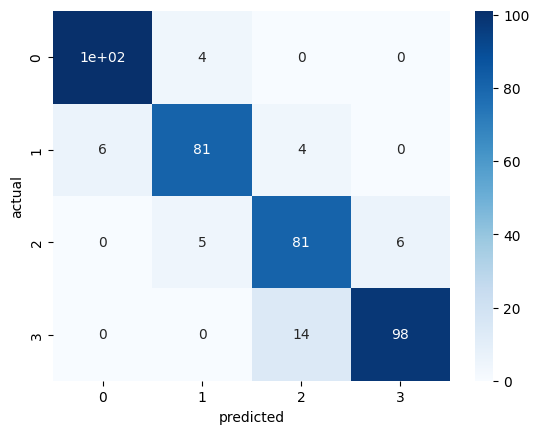

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data=cm, cmap="Blues",annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()